In [1]:
#Import required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
#Reading data

df = pd.read_csv('data/matches.csv')
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [3]:
print(df.columns)
print(df.info())
col_for_replacement = ['team1', 'team2', 'toss_winner', 'winner']
for col in col_for_replacement:
    #Delhi Daredevils is now Delhi Capitals
    df[col].replace('Delhi Daredevils', 'Delhi Capitals', inplace=True) 

#Taking only current teams (2020 edition)
team_current = ['Mumbai Indians', 'Kings XI Punjab', 'Chennai Super Kings', 
                'Royal Challengers Bangalore', 'Kolkata Knight Riders',
                'Delhi Capitals', 'Rajasthan Royals', 'Sunrisers Hyderabad'] 

#Calculating total matches played by each team
#Fill_value = 0 to convert NaN values to 0
matches_played = df['team1'].value_counts().add(df['team2'].value_counts(), fill_value=0)
matches_played = matches_played[team_current]
print(matches_played)

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   id               756 non-null    int64 
 1   season           756 non-null    int64 
 2   city             749 non-null    object
 3   date             756 non-null    object
 4   team1            756 non-null    object
 5   team2            756 non-null    object
 6   toss_winner      756 non-null    object
 7   toss_decision    756 non-null    object
 8   result           756 non-null    object
 9   dl_applied       756 non-null    int64 
 10  winner           752 non-null    object
 11  win_by_runs      756 non-null    int64 
 12 

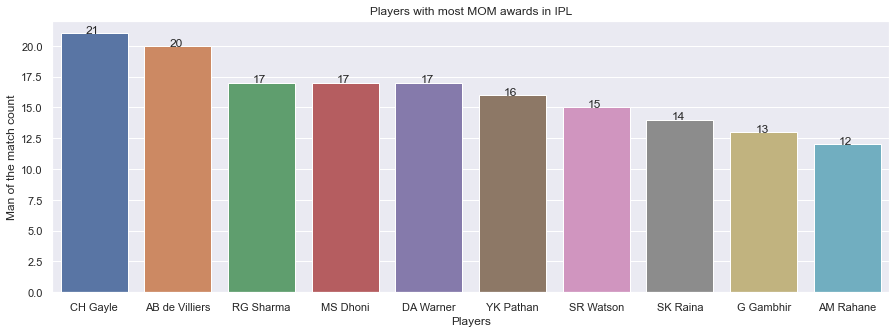

In [4]:
#Man of the match leaders in IPL history

plt.figure(figsize=(15, 5))
#Taking only top 10
ax = sns.countplot('player_of_match', data=df,order=df.player_of_match.value_counts().iloc[:10].index)
for p in ax.patches:
  x = p.get_x() + p.get_width() - 0.5
  y = p.get_y() + p.get_height()
  ax.annotate(p.get_height(), (x, y))
ax.set_xlabel('Players')
ax.set_ylabel('Man of the match count')
ax.set_title('Players with most MOM awards in IPL')
plt.show()


In [5]:
#Umpires total matches umpiring experience in ipl

df_umpire = df['umpire1'].value_counts().add(df['umpire2'].value_counts(), fill_value=0)
df_umpire.sort_values(ascending=False, inplace=True) 
df_umpire = df_umpire.to_frame() #Series to dataframe
df_umpire.reset_index(inplace=True) #Adding index
df_umpire.columns = ['Umpires', 'Total matches'] #Adding column names
df_umpire['Total matches'] = df_umpire['Total matches'].astype('int') #Converting to int
print(df_umpire)

            Umpires  Total matches
0            S Ravi            106
1   HDPK Dharmasena             87
2     C Shamshuddin             73
3      AK Chaudhary             58
4        SJA Taufel             55
..              ...            ...
70       K Bharatan              3
71        SD Ranade              2
72     Nand Kishore              1
73      Subroto Das              1
74    Sundaram Ravi              1

[75 rows x 2 columns]


For  Chennai Super Kings


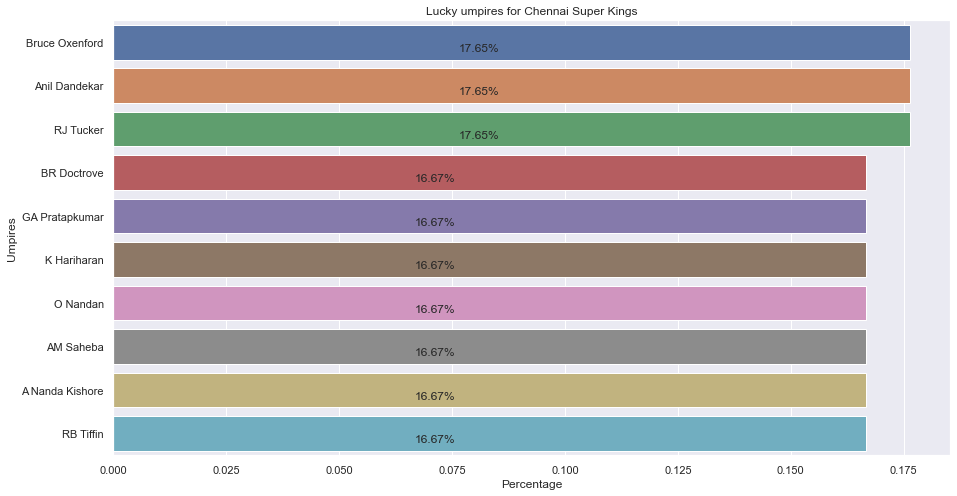

                  Umpires  Team Won  percentage
27         Bruce Oxenford         3    0.176471
28          Anil Dandekar         3    0.176471
26              RJ Tucker         3    0.176471
8             BR Doctrove         7    0.166667
53         GA Pratapkumar         1    0.166667
39            K Hariharan         2    0.166667
38               O Nandan         2    0.166667
22              AM Saheba         4    0.166667
54        A Nanda Kishore         1    0.166667
7               RB Tiffin         7    0.166667
21              BF Bowden         4    0.160000
25             Rod Tucker         3    0.157895
15                  S Das         5    0.156250
11           BNJ Oxenford         6    0.153846
37         Chris Gaffaney         2    0.153846
20         Yeshwant Barde         4    0.153846
19              JD Cloete         4    0.148148
5               Asad Rauf         8    0.148148
10            RE Koertzen         6    0.146341
9               M Erasmus         6    0

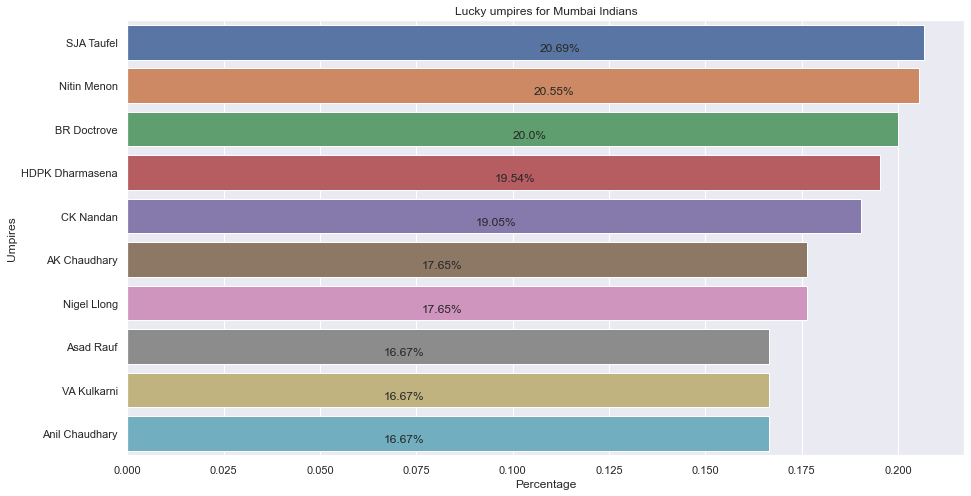

                  Umpires  Team Won  percentage
3              SJA Taufel        12    0.206897
2             Nitin Menon        15    0.205479
4             BR Doctrove        11    0.200000
1         HDPK Dharmasena        17    0.195402
7               CK Nandan         8    0.190476
6            AK Chaudhary         9    0.176471
26            Nigel Llong         3    0.176471
5               Asad Rauf         9    0.166667
8             VA Kulkarni         7    0.166667
40         Anil Chaudhary         2    0.166667
39              SS Hazare         2    0.166667
38             BG Jerling         2    0.166667
0                  S Ravi        17    0.160377
25               O Nandan         3    0.157895
15          C Shamshuddin         5    0.156250
20           BNJ Oxenford         4    0.153846
37              JD Cloete         2    0.153846
19              DJ Harper         4    0.148148
9             CB Gaffaney         6    0.146341
10              RJ Tucker         6    0

In [6]:
#Function to know if umpires contribute(or be lucky) in teams performance

def umpire(teams):
    
    #Umpires count for given winning team
    umpire1 = df[['umpire1', 'winner']].where(df['winner']==teams).groupby('umpire1').count().sort_values(by='winner', ascending=False)
    umpire2 = df[['umpire2', 'winner']].where(df['winner']==teams).groupby('umpire2').count().sort_values(by='winner', ascending=False)
    umpire = umpire1.add(umpire2, fill_value=0).sort_values(by='winner', ascending=False)
    umpire.reset_index(inplace=True)
    umpire.columns = ['Umpires', 'Team Won']
    umpire['Team Won'] = umpire['Team Won'].astype('int')
    
    #Find percentage of matches won with each umpire 
    #(Matches won with given umpire/Total matches umpired)
    umpire['percentage'] = umpire['Team Won'].div(df_umpire['Total matches'], fill_value=0)
    umpire.sort_values(by='percentage', inplace=True, ascending=False)
    
    print("For ", teams)
    plt.figure(figsize=(15, 8))
    ax = sns.barplot(x='percentage', y='Umpires', data=umpire, order=umpire.Umpires.iloc[:10])
    
    #For anotation
    for p in ax.patches:
      x = p.get_x() + p.get_width() - 0.1
      y = p.get_y() + p.get_height() - 0.2
      ax.annotate('{}%'.format(round(p.get_width()*100, 2)), (x, y))
    
    ax.set_xlabel('Percentage')
    ax.set_title('Lucky umpires for '+teams)
    plt.show()
    return umpire

print(umpire('Chennai Super Kings'))
print(umpire('Mumbai Indians'))

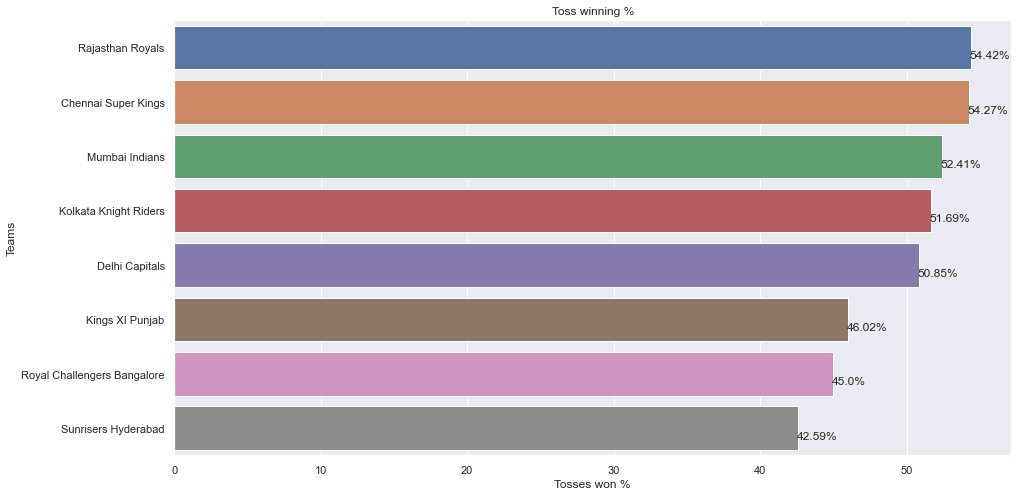

In [7]:
#Toss winning count

df_toss = df.toss_winner.value_counts().iloc[:8]
percentage_toss = round(df_toss/matches_played*100, 2)
percentage_toss.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(15, 8))

#Horizontal bar plot
ax = sns.barplot(y = percentage_toss.index, x = percentage_toss)
for p in ax.patches:
  x = p.get_x() + p.get_width() - 0.1
  y = p.get_y() + p.get_height() - 0.2
  ax.annotate(str(p.get_width())+"%", (x, y))
ax.set_xlabel('Tosses won %')
ax.set_ylabel('Teams')
ax.set_title('Toss winning %')
plt.show()


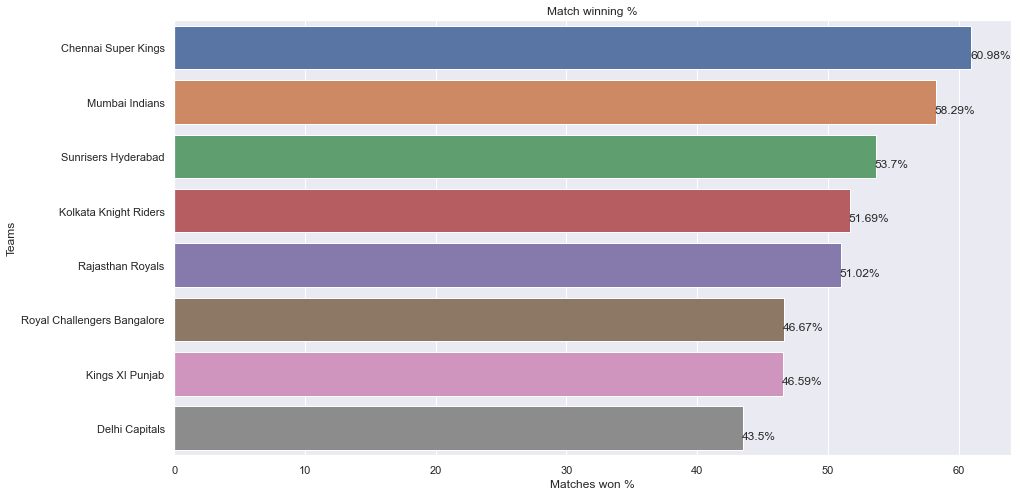

In [8]:
#Match winning count

df_winner = df.winner.value_counts().iloc[:8]
percentage_win = round(df_winner/matches_played*100, 2)
percentage_win.sort_values(ascending=False, inplace=True)
plt.figure(figsize=(15, 8))
ax = sns.barplot(y = percentage_win.index, x = percentage_win)
for p in ax.patches:
  x = p.get_x() + p.get_width() - 0.1
  y = p.get_y() + p.get_height() - 0.2
  ax.annotate(str(p.get_width())+"%", (x, y))
ax.set_xlabel('Matches won %')
ax.set_ylabel('Teams')
ax.set_title('Match winning %')
plt.show()


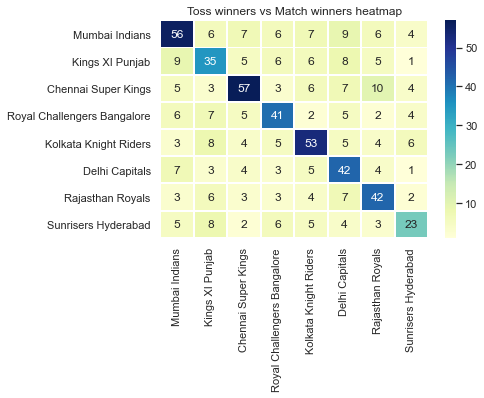

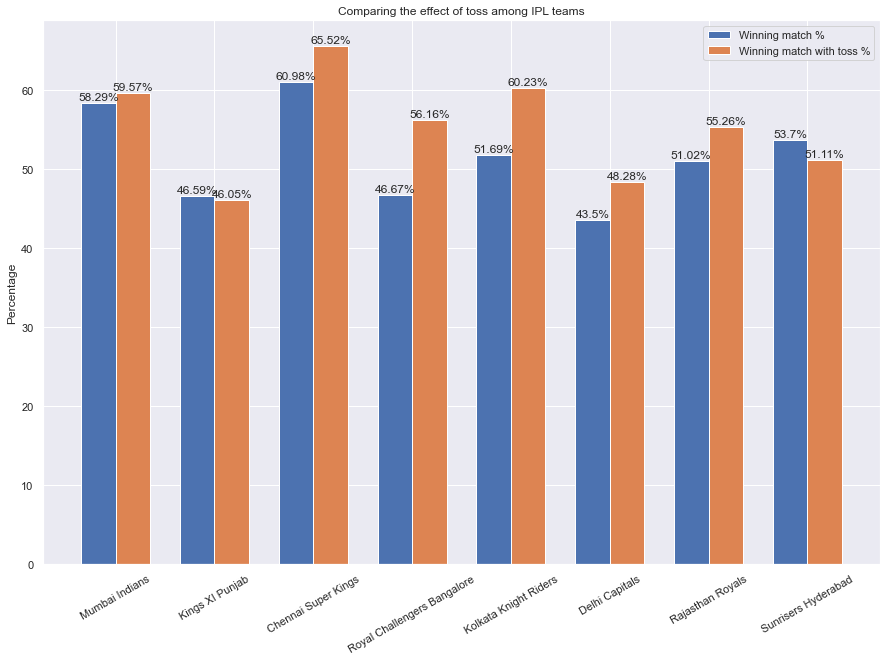

In [9]:
#Toss vs Match winner

from sklearn.metrics import confusion_matrix
import seaborn as sns

def toss_vs_match():
    
        #For Heat Map
        
        #Labels to replace teams names for confusion matrix
        labels = [0, 1, 2, 3, 4, 5, 6, 7]
        df_plot = df[['team1', 'team2', 'winner', 'toss_winner']].copy()
        
        #Only take current teams
        df_plot.winner = df_plot.winner.where(df_plot.winner.isin(team_current))
        df_plot.toss_winner = df_plot.toss_winner.where(df_plot.toss_winner.isin(team_current))
        df_plot.replace(team_current, labels, inplace=True)
        df_plot.dropna(inplace=True)
        
        conf = confusion_matrix(df_plot.winner, df_plot.toss_winner)
        ax_heat = sns.heatmap(conf,xticklabels=team_current, yticklabels=team_current,
                              annot=True, cmap="YlGnBu", linewidths=0.9)
        ax_heat.set_title('Toss winners vs Match winners heatmap')
        plt.show()
        
        total_matches = df_plot.team1.value_counts().iloc[:8].add(df_plot.
                                                                  team2.value_counts().iloc[:8],
                                                                  fill_value=0)
        total_toss_won = df_plot.toss_winner.value_counts()
        
        #For dataframe
        
        win_per = []
        win_per_toss = []
        for i in range(len(team_current)):
            win_per.append(percentage_win[team_current[i]])
            win_per_toss.append(round(conf[i][i]/total_toss_won[i]*100, 2))
            
        df_bar = pd.DataFrame({'Teams':team_current, 'Winning percentage':win_per,
                               'Winning percentage and toss':win_per_toss, 
                               '% Change': np.array(win_per)-np.array(win_per_toss)})
        
        #For bar plot
        
        #For plotting  two vertical bars side by side
        x = np.arange(len(df_bar.Teams))
        width = 0.35

        fig, ax = plt.subplots(figsize=(15, 10))
        bar1 = ax.bar(x = x-width/2, height = df_bar['Winning percentage'], 
                      label='Winning match %', width=width)
        bar2 = ax.bar(x = x+width/2, height = df_bar['Winning percentage and toss'], 
                      label='Winning match with toss %', width=width)

        ax.set_ylabel('Percentage')
        ax.set_title('Comparing the effect of toss among IPL teams')
        ax.set_xticks(x)
        ax.set_xticklabels(df_bar.Teams)
        ax.legend()
        plt.xticks(rotation='30')
        
        #Annotation function
        def per_label(bars):
            for bar in bars:
                h = bar.get_height()
                ax.annotate("{}%".format(h), xy = (bar.get_x() + bar.get_width()/2, h),
                            xytext=(0, 3),
                textcoords="offset points", ha='center')

        per_label(bar1)
        per_label(bar2)

toss_vs_match()

In [10]:
#Reading ball by ball dataset

ball_by_ball = pd.read_csv('data/deliveries.csv')
ball_by_ball.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [11]:
print(ball_by_ball.info())
ball_by_ball.drop(['fielder', 'bye_runs', 'legbye_runs', 'penalty_runs', 'extra_runs']
                  , axis=1, inplace=True)
ball_by_ball.replace('Delhi Daredevils', 'Delhi Capitals', inplace=True)
ball_by_ball['batting_team'] = ball_by_ball['batting_team'].where(ball_by_ball.batting_team.isin(team_current))
ball_by_ball['bowling_team'] = ball_by_ball['bowling_team'].where(ball_by_ball.bowling_team.isin(team_current))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179078 entries, 0 to 179077
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          179078 non-null  int64 
 1   inning            179078 non-null  int64 
 2   batting_team      179078 non-null  object
 3   bowling_team      179078 non-null  object
 4   over              179078 non-null  int64 
 5   ball              179078 non-null  int64 
 6   batsman           179078 non-null  object
 7   non_striker       179078 non-null  object
 8   bowler            179078 non-null  object
 9   is_super_over     179078 non-null  int64 
 10  wide_runs         179078 non-null  int64 
 11  bye_runs          179078 non-null  int64 
 12  legbye_runs       179078 non-null  int64 
 13  noball_runs       179078 non-null  int64 
 14  penalty_runs      179078 non-null  int64 
 15  batsman_runs      179078 non-null  int64 
 16  extra_runs        179078 non-null  int

In [12]:
def bowler_stats(bowler, get_n=20):
    
        '''
        parameters:
        bowler - Bowler name according to dataset
        get_n - Get top n entries for all
        '''
        
        #Dataset for specific bowler
        bowler_balls = ball_by_ball[ball_by_ball.bowler==bowler]
        
        #Boundaries count
        sixes_count = bowler_balls[bowler_balls.batsman_runs==6].batsman.value_counts()
        fours_count  = bowler_balls[bowler_balls.batsman_runs==4].batsman.value_counts()
        boundaries_count = sixes_count.add(fours_count, fill_value=0)
        boundaries_count.sort_values(inplace=True, ascending=False)
        
        #Batsmen runs against the bowler
        batsmen_runs = bowler_balls.groupby('batsman').batsman_runs.sum().sort_values(ascending=False)
        
        #To find total balls faced by each batsman to this bowler
        balls_dict = {}
        for players in bowler_balls.batsman.value_counts().index:
            #wide balls = total balls for each player - total 0 in wide balls value
            wide_balls = bowler_balls[bowler_balls.batsman==players].wide_runs.value_counts().sum() - bowler_balls[bowler_balls.batsman==players].wide_runs.value_counts().loc[0] 
            #no balls = total balls for each player - total 0 in no balls value
            no_balls = bowler_balls[bowler_balls.batsman==players].noball_runs.value_counts().sum() - bowler_balls[bowler_balls.batsman==players].noball_runs.value_counts().loc[0]
            balls_faced = bowler_balls[bowler_balls.batsman==players].shape[0] - wide_balls - no_balls
            balls_dict[players] = balls_faced
        ball_faced = pd.Series(balls_dict)
        
        threshold_balls=10
        strike_rate = (batsmen_runs/ball_faced[ball_faced>threshold_balls]*100).sort_values(ascending=False)
        
        #Economy against all teams
        teams_runs = bowler_balls.groupby('batting_team').batsman_runs.sum()
        
        #To find total balls faced by each team to this bowler
        balls_dict_team = {}
        for team in bowler_balls.batting_team.value_counts().index:
        
            wide_balls_team = bowler_balls[bowler_balls.batting_team==team].wide_runs.value_counts().sum() - bowler_balls[bowler_balls.batting_team==team].wide_runs.value_counts().loc[0] 
            no_balls_team = bowler_balls[bowler_balls.batting_team==team].noball_runs.value_counts().sum() - bowler_balls[bowler_balls.batting_team==team].noball_runs.value_counts().loc[0]
            balls_faced_team = bowler_balls[bowler_balls.batting_team==team].shape[0] - wide_balls_team - no_balls_team
            balls_dict_team[team] = balls_faced_team
        
        teams_balls = pd.Series(balls_dict_team)
        
        #Dismissed count and kind
        player_dismissed_count = bowler_balls.groupby('batsman').player_dismissed.count().sort_values(ascending=False) 
        dismissal_kind = bowler_balls.dismissal_kind.value_counts().drop(labels='run out')
       
        print(f"Some lucky players who could smash {bowler} for a six in IPL\n{sixes_count[:get_n]}\n")
        print(f"Some lucky players who could smash {bowler} for a four in IPL\n{fours_count[:get_n]}\n")
        print(f"Boundaries against {bowler} in IPL \n{boundaries_count[:get_n]}\n")
        print(f"Batsman with most runs against {bowler} in IPL\n{batsmen_runs[:get_n]}\n")
        print(f"Top 10 highest strike rates against {bowler}\n{round(strike_rate.iloc[:get_n], 2)}\n")
        print(f"Economy of {bowler} according against teams\n{round(teams_runs/teams_balls*6, 2)[:get_n]}\n")
        print(f"Player dismissed count of {bowler}\n{player_dismissed_count[:get_n]}\n")
        print(f"Dismissal kind of {bowler} \n{dismissal_kind[:get_n]}\n")

bowler_stats('Rashid Khan', get_n=10)
#bowler_stats('S Lamichhane', get_n=10)

Some lucky players who could smash Rashid Khan for a six in IPL
CH Gayle           6
RV Uthappa         4
S Hetmyer          4
M Vohra            3
C de Grandhomme    3
SR Watson          3
SS Iyer            3
AM Rahane          2
AT Rayudu          2
SK Raina           2
Name: batsman, dtype: int64

Some lucky players who could smash Rashid Khan for a four in IPL
RR Pant       7
SR Watson     6
SK Raina      6
SS Iyer       5
AT Rayudu     5
RV Uthappa    4
M Vohra       4
N Rana        4
SV Samson     3
KD Karthik    3
Name: batsman, dtype: int64

Boundaries against Rashid Khan in IPL 
SR Watson          9.0
SS Iyer            8.0
SK Raina           8.0
RR Pant            8.0
RV Uthappa         8.0
M Vohra            7.0
AT Rayudu          7.0
CH Gayle           6.0
N Rana             5.0
C de Grandhomme    5.0
Name: batsman, dtype: float64

Batsman with most runs against Rashid Khan in IPL
batsman
SR Watson     65
RV Uthappa    62
SS Iyer       61
RR Pant       55
SK Raina      51


In [13]:
def batsman_stats(batsman, get_n=20):
        '''
        parameters:
        batsman - Batsman name according to dataset
        get_n - Get top n entries for  features
        '''
        
        ball = ball_by_ball.copy()
        batsman_stats = ball[ball.batsman==batsman]

        #Total runs by batsman
        runs = batsman_stats.batsman_runs.sum()

        #To calculate total balls faced
        wide_balls = batsman_stats.wide_runs.value_counts().sum() - batsman_stats.wide_runs.value_counts().loc[0] 
        no_balls = batsman_stats.noball_runs.value_counts().sum() - batsman_stats.noball_runs.value_counts().loc[0]
        balls = batsman_stats.shape[0] - wide_balls - no_balls
        strike_rate = runs/balls * 100

        #Leading wicket takers of the batsman
        wicket_takers = batsman_stats[batsman_stats.player_dismissed==batsman].bowler.value_counts()

        #Dismissal kind 
        dismissal_kind = batsman_stats[batsman_stats.player_dismissed==batsman].dismissal_kind.value_counts()

        #Runs against bowlers
        runs_bowlers = batsman_stats.groupby('bowler').batsman_runs.sum().sort_values(ascending=False)

        #Strike rate against bowlers
        balls_dict_player = {}
        for player in batsman_stats.bowler.value_counts().index:

                wide_balls_player = batsman_stats[batsman_stats.bowler==player].wide_runs.value_counts().sum() - batsman_stats[batsman_stats.bowler==player].wide_runs.value_counts().loc[0] 
                no_balls_player = batsman_stats[batsman_stats.bowler==player].noball_runs.value_counts().sum() - batsman_stats[batsman_stats.bowler==player].noball_runs.value_counts().loc[0]
                balls_faced_player = batsman_stats[batsman_stats.bowler==player].shape[0] - wide_balls_player - no_balls_player
                balls_dict_player[player] = balls_faced_player

        balls_players = pd.Series(balls_dict_player)

        #Minimum balls faced = threshold_balls
        threshold_balls = 24
        strike_rate = (runs_bowlers/balls_players[balls_players>threshold_balls]*100).sort_values(ascending=False)
        
        print(f"{batsman} total runs in IPL\n{runs}\n")
        print(f"{batsman} total runs against bowlers\n{runs_bowlers[:get_n]}\n")
        print(f"{batsman} highest strike rate against bowlers(minimum 24 balls faced)\n{round(strike_rate, 2)[:get_n]}\n")
        print(f"Leading {batsman} wicket takers\n{wicket_takers[:get_n]}\n")
        print(f"Dismissal kind count of {batsman}\n{dismissal_kind}")

batsman_stats('AB de Villiers', get_n=10)

AB de Villiers total runs in IPL
4428

AB de Villiers total runs against bowlers
bowler
SL Malinga         125
RA Jadeja          104
Harbhajan Singh    103
HH Pandya           89
Sandeep Sharma      87
JJ Bumrah           72
CH Morris           72
DJ Bravo            70
MM Sharma           69
IK Pathan           67
Name: batsman_runs, dtype: int64

AB de Villiers highest strike rate against bowlers(minimum 24 balls faced)
MM Sharma         246.43
HH Pandya         228.21
CH Morris         218.18
A Nehra           217.86
P Kumar           208.00
Sandeep Sharma    207.14
JP Faulkner       206.67
SL Malinga        204.92
M Ashwin          192.00
SB Jakati         189.66
dtype: float64

Leading AB de Villiers wicket takers
PP Chawla          4
KH Pandya          4
S Gopal            4
L Balaji           3
JA Morkel          3
SP Narine          3
Harbhajan Singh    3
KA Pollard         2
Sandeep Sharma     2
SB Jakati          2
Name: bowler, dtype: int64

Dismissal kind count of AB de Vi

In [15]:
#Data preprocessing for machine learning

#Dropping all rows which has NaN values in batting_team and bowling_team columns
ball_by_ball.dropna(subset=['batting_team', 'bowling_team'], inplace=True)
useful_cols = ['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 
                'total_runs', 'player_dismissed']
df_ml = ball_by_ball[useful_cols]

#We only need first inning data
df_innings_first = df_ml[df_ml.inning==1].drop('inning', axis=1)

In [17]:
#Scores and wickets at the end of the innings

scores = df_innings_first.groupby('match_id').total_runs.sum()
wickets = df_innings_first.groupby('match_id').player_dismissed.count()

#Scores and wickets at over 10

scores_10 = df_innings_first[df_innings_first.over<11].groupby('match_id').total_runs.sum()
wickets_10 = df_innings_first[df_innings_first.over<11].groupby('match_id').player_dismissed.count()

match_id
1        207
5        157
7        178
8        148
10       158
        ... 
11347    143
11412    136
11413    171
11414    155
11415    152
Name: total_runs, Length: 571, dtype: int64


In [19]:
#Only take first three columns
df_innings_first = df_innings_first.iloc[:, :3]

#Drop dublicates: match_id, batting_team, bowling_team
df_innings_first.drop_duplicates(inplace=True)
df_innings_first.drop('match_id', axis=1, inplace=True)

In [20]:
#Adding new columns

df_innings_first['scores_over_10'] = scores_10.values
df_innings_first['wickets_over_10'] = wickets_10.values

#df_innings_first['total_wickets'] = wickets.values
df_innings_first['total_score'] = scores.values

In [21]:
#One hot encoding the batting_team and bowling_team columns

onehot = pd.get_dummies(df_innings_first[['batting_team', 'bowling_team']], drop_first=True)
df_model = pd.concat([onehot, df_innings_first], axis=1)
df_model.drop(['batting_team', 'bowling_team'], axis=1, inplace=True)
df_model

,batting_team_Delhi Capitals,batting_team_Kings XI Punjab,batting_team_Kolkata Knight Riders,batting_team_Mumbai Indians,batting_team_Rajasthan Royals,batting_team_Royal Challengers Bangalore,batting_team_Sunrisers Hyderabad,bowling_team_Delhi Capitals,bowling_team_Kings XI Punjab,bowling_team_Kolkata Knight Riders,bowling_team_Mumbai Indians,bowling_team_Rajasthan Royals,bowling_team_Royal Challengers Bangalore,bowling_team_Sunrisers Hyderabad,scores_over_10,wickets_over_10,total_score
0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,88,1,207
960,0,0,0,0,0,1,0,1,0,0,0,0,0,0,61,3,157
1424,0,0,1,0,0,0,0,0,0,0,1,0,0,0,79,3,178
1678,0,0,0,0,0,1,0,0,1,0,0,0,0,0,53,3,148
2116,0,0,0,0,0,0,1,0,0,0,1,0,0,0,75,0,158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177874,0,0,1,0,0,0,0,0,0,0,1,0,0,0,64,2,143
178102,0,0,0,0,0,0,0,0,0,0,1,0,0,0,51,3,136
178339,0,0,0,0,0,0,1,1,0,0,0,0,0,0,75,2,171
178591,1,0,0,0,0,0,0,0,0,0,0,0,0,0,70,3,155


In [44]:
#Machine Learning

#!pip install xgboost
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.model_selection import train_test_split

X = df_model.iloc[:, :-1]
y = df_model.iloc[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=77, shuffle=True)

#Trying multiple models and examining scores

# instance = [RandomForestRegressor(), LinearRegression(), ElasticNet(), Lasso(), Ridge(),
#             GradientBoostingRegressor(), BaggingRegressor(), 
#             XGBRegressor(objective ='reg:squarederror'), 
#             DecisionTreeRegressor(), KNeighborsRegressor()]
# models = ['Random Forest', 'Linear Regression', 'ElasticNet', 'Lasso', 'Ridge','Gradient Boost', 'Bagging', 'XG Boost', 'Decision Tree',
#     'KNN']
# for model in instance:
#     model.fit(X_train, y_train)
#     print(f"{models[instance.index(model)]} score is: {model.score(X_test, y_test)}\n")

#Best model

model = RandomForestRegressor()
model.fit(X, y)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [57]:
#Prediction

print("All teams code:\n 0. CSK\n 1. DC\n 2. KXIP\n 3. KKR\n 4. MI\n 5. RR\n 6. RCB\n 7. SRH\n")
choice_bat = input("Enter batting team's code: ")
choice_ball = input("Enter bowling team's code: ")
score_10 = int(input("Enter teams score at over 10: "))
wic_10 = int(input("Enter teams wickets at over 10: "))
def teams(choice):
    switcher = {
        '0': [0, 0, 0, 0, 0, 0, 0], 
        '1': [1, 0, 0, 0, 0, 0, 0],
        '2': [0, 1, 0, 0, 0, 0, 0],
        '3': [0, 0, 1, 0, 0, 0, 0],
        '4': [0, 0, 0, 1, 0, 0, 0],
        '5': [0, 0, 0, 0, 1, 0, 0],
        '6': [0, 0, 0, 0, 0, 1, 0],
        '7': [0, 0, 0, 0, 0, 0, 1]
    }
    return switcher.get(choice,"Invalid option selected")

array = (teams(choice_bat)+teams(choice_ball))
array.extend([score_10, wic_10])

print(f"\n THE PREDICTED SCORE IS: {int(model.predict([array]).squeeze())}")

All teams code:
 0. CSK
 1. DC
 2. KXIP
 3. KKR
 4. MI
 5. RR
 6. RCB
 7. SRH

Enter batting team's code: 0
Enter bowling team's code: 5
Enter teams score at over 10: 90
Enter teams wickets at over 10: 4

 THE PREDICTED SCORE IS: 192
